### Plotting oil production data by using pulled data from Colorado Oil & Gas Conservation Commission
Colorado Oil & Gas Conservation Commission Well Surface Location Data were used to plot time series. Especially for loop below helps to plot the necessary data by pulling necessary tables that contain oil production data. 

geopandas and pandas packages were used to read and edit data frames. geopandas is used to read shapefile (GIS data) tables and pandas is used to read tables in html.

After importing libraries geopandas and pandas, one can use url or a file path to read the shapefile. Luckily, geopandas can read zip files, thus you do not need to download GIS data each time, which saves significant amount of time. 

In [15]:
import geopandas as gpd
import pandas as pd

url = 'https://cogcc.state.co.us/documents/data/downloads/gis/WELLS_SHP.ZIP'
#file_path = 'data/WELLS_SHP/Wells.shp'


print('reading data\n')
ds = gpd.read_file(url)

print('data reading - done\n')


reading data

data reading - done



Purpose is to plot the oil production time series. Therefore, only producing wells will be selected.

In [36]:
print(ds.API.loc[ds.Facil_Stat == 'PR'].values[:])

['00105242' '00105289' '00105299' ... '12512124' '12512125' '12512126']


Oil production and time data will be stored in a dict (called 'd' hereafter). 

In [17]:

d = {}
print('\n for loop to download oil production and time data for producing wells is starting \n')
for x in (ds.API[ds.Facil_Stat =='PR']):
    a = ds.API_County.loc[ds.API == x].item()
    b = ds.API_Seq.loc[ds.API == x].item()
    print('x = ' + x + ' a = ' + a + ' b =' + b)
    website = 'https://cogcc.state.co.us/production/?&apiCounty='+a+'&apiSequence='+b+'&APIWB=00&Year=All'
    print(website)
    dfs = pd.read_html(website)
    dfs[1]['First of Month'] = pd.to_datetime(dfs[1]['First of Month'])

    data = {
    'Time' : dfs[1]['First of Month'] ,
    'Oilprod' : dfs[1]['Oil Produced']
    }
    d[x] = pd.DataFrame(data)
    if b == '08294':
        break
print('\n for loop - successful \n')



 for loop to download oil production and time data for producing wells is starting 

x = 00105242 a = 001 b =05242
https://cogcc.state.co.us/production/?&apiCounty=001&apiSequence=05242&APIWB=00&Year=All
x = 00105289 a = 001 b =05289
https://cogcc.state.co.us/production/?&apiCounty=001&apiSequence=05289&APIWB=00&Year=All
x = 00105299 a = 001 b =05299
https://cogcc.state.co.us/production/?&apiCounty=001&apiSequence=05299&APIWB=00&Year=All
x = 00105534 a = 001 b =05534
https://cogcc.state.co.us/production/?&apiCounty=001&apiSequence=05534&APIWB=00&Year=All
x = 00105542 a = 001 b =05542
https://cogcc.state.co.us/production/?&apiCounty=001&apiSequence=05542&APIWB=00&Year=All
x = 00105544 a = 001 b =05544
https://cogcc.state.co.us/production/?&apiCounty=001&apiSequence=05544&APIWB=00&Year=All
x = 00106007 a = 001 b =06007
https://cogcc.state.co.us/production/?&apiCounty=001&apiSequence=06007&APIWB=00&Year=All
x = 00106060 a = 001 b =06060
https://cogcc.state.co.us/production/?&apiCounty=00

Now, I have a dictionary that contains oil production and time for producing wells for each API has been downloaded. Since this database is a very large one, data acquisition was stopped at well # 08294. If needed code can be specialized to produce result oriented data (for example to obtain wells that produce higher than 'X' bbl etc..). 

matplotlib library was used to plot the results. As can be seen, each well was plotted in the dictionary.


 Production data download -  successful


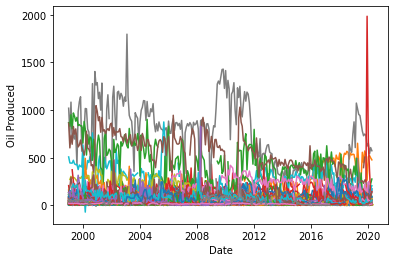

In [18]:
import matplotlib.pyplot as plt

print('\n Production data download -  successful')

for m in list(d):
    plt.plot(d[m]['Time'], d[m]['Oilprod'], label = m)

#plt.legend()
plt.xlabel('Date')
plt.ylabel('Oil Produced')
plt.show()
